In [76]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# How are in-demand skills trending for Data Analysts?

## Methodology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [ ]:
df_DA_CAN = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='Canada')].copy() #filtering the data to Canadian Data Analyst job postings

In [ ]:
df_DA_CAN['job_posted_month_no'] = df_DA_CAN['job_posted_date'].dt.month 
#creating new column with only the respective month. Using this method instead of .strftime because this allows for the months to be ordered

In [ ]:
df_exploded = df_DA_CAN.explode('job_skills') 
# exploding the skills since in the original data they are in a list and unable to be counted individually

In [ ]:
df_DA_CAN_pivot = df_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value = 0) 
#creating a pivot table of the skills where the index is the months and the values are the count of the appearance of those skills per month

df_DA_CAN_pivot.loc['Total'] = df_DA_CAN_pivot.sum() #creating a final row called total that sums the count of each skill

df_DA_CAN_pivot = df_DA_CAN_pivot[df_DA_CAN_pivot.loc['Total'].sort_values(ascending=False).index] 
# updating the pivot table where the total is in descending order from largest to smallest

df_DA_CAN_pivot = df_DA_CAN_pivot.drop('Total')
#since the aim of including the total row was to order the skills from largest to smallest in the pivot table, it is no longer needed and thus dropped

df_DA_CAN_pivot


job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,monday.com,mxnet,fastapi,firestore,django,rust,symphony,ubuntu,trello,watson
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,143,105,92,62,55,39,36,20,29,29,...,0,1,0,1,1,1,0,0,0,0
2,78,49,40,21,27,16,22,17,14,15,...,0,0,0,0,0,0,1,0,0,0
3,79,49,44,37,23,26,24,9,18,14,...,0,0,0,0,0,0,0,0,0,0
4,103,48,56,41,36,25,26,14,13,14,...,0,0,0,0,0,0,0,0,0,0
5,91,66,55,49,32,28,26,17,14,11,...,0,0,0,0,0,0,0,0,1,1
6,90,71,50,46,33,23,20,15,16,15,...,1,0,0,0,0,0,0,0,0,0
7,104,75,60,55,50,32,20,22,14,9,...,0,0,0,0,0,0,0,1,0,0
8,100,48,64,59,45,39,14,14,12,15,...,0,0,0,0,0,0,0,0,0,0
9,126,72,80,63,54,46,26,19,21,18,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
DA_totals = df_DA_CAN.groupby('job_posted_month_no').size()
# creating a new dataframe that sums the amount of job postings per month

DA_totals

job_posted_month_no
1     286
2     148
3     155
4     179
5     160
6     183
7     208
8     183
9     209
10    234
11    203
12    217
dtype: int64

In [ ]:
df_DA_CAN_percent = df_DA_CAN_pivot.div(DA_totals/100, axis = 0) #Finding the likelihood of a job skill appearing in a job posting in a specific month

df_DA_CAN_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,monday.com,mxnet,fastapi,firestore,django,rust,symphony,ubuntu,trello,watson
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,50.000000,36.713287,32.167832,21.678322,19.230769,13.636364,12.587413,6.993007,10.139860,10.139860,...,0.000000,0.34965,0.000000,0.34965,0.34965,0.34965,0.000000,0.000000,0.000,0.000
2,52.702703,33.108108,27.027027,14.189189,18.243243,10.810811,14.864865,11.486486,9.459459,10.135135,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.675676,0.000000,0.000,0.000
3,50.967742,31.612903,28.387097,23.870968,14.838710,16.774194,15.483871,5.806452,11.612903,9.032258,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000
4,57.541899,26.815642,31.284916,22.905028,20.111732,13.966480,14.525140,7.821229,7.262570,7.821229,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000
5,56.875000,41.250000,34.375000,30.625000,20.000000,17.500000,16.250000,10.625000,8.750000,6.875000,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.625,0.625
6,49.180328,38.797814,27.322404,25.136612,18.032787,12.568306,10.928962,8.196721,8.743169,8.196721,...,0.546448,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000
7,50.000000,36.057692,28.846154,26.442308,24.038462,15.384615,9.615385,10.576923,6.730769,4.326923,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.480769,0.000,0.000
8,54.644809,26.229508,34.972678,32.240437,24.590164,21.311475,7.650273,7.650273,6.557377,8.196721,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000
9,60.287081,34.449761,38.277512,30.143541,25.837321,22.009569,12.440191,9.090909,10.047847,8.612440,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000


In [ ]:
# converting the numbered months into the name of the months for visualization purposes

df_DA_CAN_percent=df_DA_CAN_percent.reset_index()
df_DA_CAN_percent['job_posted_month'] = df_DA_CAN_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_DA_CAN_percent = df_DA_CAN_percent.set_index('job_posted_month')
df_DA_CAN_percent = df_DA_CAN_percent.drop(columns='job_posted_month_no')

df_DA_CAN_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,monday.com,mxnet,fastapi,firestore,django,rust,symphony,ubuntu,trello,watson
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,50.000000,36.713287,32.167832,21.678322,19.230769,13.636364,12.587413,6.993007,10.139860,10.139860,...,0.000000,0.34965,0.000000,0.34965,0.34965,0.34965,0.000000,0.000000,0.000,0.000
Feb,52.702703,33.108108,27.027027,14.189189,18.243243,10.810811,14.864865,11.486486,9.459459,10.135135,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.675676,0.000000,0.000,0.000
Mar,50.967742,31.612903,28.387097,23.870968,14.838710,16.774194,15.483871,5.806452,11.612903,9.032258,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000
Apr,57.541899,26.815642,31.284916,22.905028,20.111732,13.966480,14.525140,7.821229,7.262570,7.821229,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000
May,56.875000,41.250000,34.375000,30.625000,20.000000,17.500000,16.250000,10.625000,8.750000,6.875000,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.625,0.625
Jun,49.180328,38.797814,27.322404,25.136612,18.032787,12.568306,10.928962,8.196721,8.743169,8.196721,...,0.546448,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000
Jul,50.000000,36.057692,28.846154,26.442308,24.038462,15.384615,9.615385,10.576923,6.730769,4.326923,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.480769,0.000,0.000
Aug,54.644809,26.229508,34.972678,32.240437,24.590164,21.311475,7.650273,7.650273,6.557377,8.196721,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000
Sep,60.287081,34.449761,38.277512,30.143541,25.837321,22.009569,12.440191,9.090909,10.047847,8.612440,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000


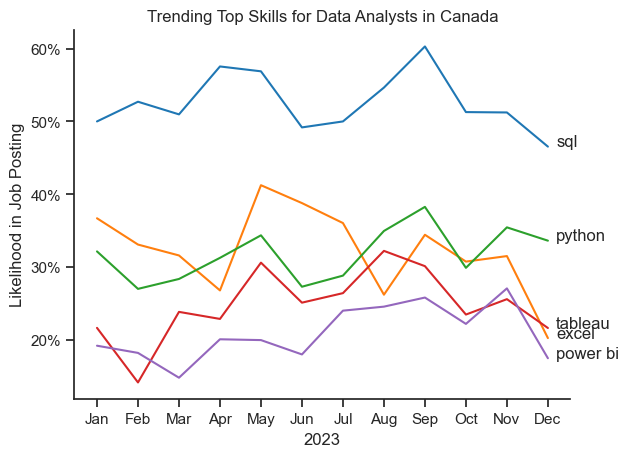

In [ ]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_CAN_percent.iloc[:,:5] ## filtering the first five skills from the final percentage pivot table

sns.lineplot(df_plot, dashes = False, palette = 'tab10') #plotting the data using seaborn
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Canada')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter()) #formatting the y axis to show percentages

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i], df_plot.columns[i]) #adding the name of the skills at the end of each line

plt.show()